<a href="https://colab.research.google.com/github/Sejalmali/Projects/blob/main/Real_life_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
!pip install pandas
!pip install os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [113]:
import pandas as pd
import os

In [114]:
df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files=[file for file in os.listdir('./Sales_Data')if not os.path.isdir(os.path.join('./Sales_Data',file))]
all_months_data=pd.DataFrame()

for file in files:
  df= pd.read_csv("./Sales_Data/"+file)
  all_months_data=pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv",index=False)

In [115]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


#Cleaning of Data

In [116]:
all_data.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
95,259450,AAA Batteries (4-pack),1,2.99,10/16/19 19:49,"796 8th St, San Francisco, CA 94016"
96,259451,34in Ultrawide Monitor,1,379.99,10/13/19 19:46,"951 Elm St, Dallas, TX 75001"
97,259452,USB-C Charging Cable,1,11.95,10/27/19 02:21,"709 Madison St, San Francisco, CA 94016"
98,259453,Flatscreen TV,1,300.0,10/10/19 12:59,"94 Spruce St, Los Angeles, CA 90001"


In [117]:
nan_df=all_data[all_data.isna()].any(axis=1)
nan_df.head()

all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [118]:
temp_df=all_data[all_data['Order Date'].str[0:2]=='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
521,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
833,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2180,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2388,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4248,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [119]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

##Convert column to correct type

In [120]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])#make float
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


##Augment Data

##Add month column

In [121]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10


##Add Sales COlumn

In [122]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99


##Best Month Of Sales

In [123]:
results=all_data.groupby('Month').sum()

<ipython-input-123-99f4475d62eb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results=all_data.groupby('Month').sum()


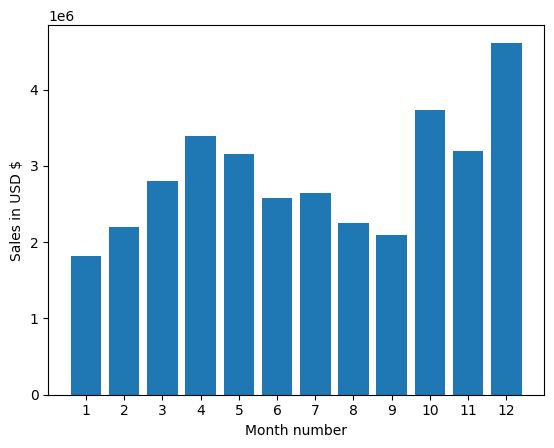

In [124]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD $')
plt.xlabel('Month number')
plt.show()

##Q: which city have highest number of sales?



Add city column using .apply method

In [125]:
def get_City(address):
  return address.split(',')[1]

def get_states(address):
  return address.split(',')[2].split(' ')[1]

all_data['City']=all_data['Purchase Address'].apply(lambda x: get_City(x)+' ('+get_states(x)+')')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas (TX)
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles (CA)
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City (NY)
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City (NY)
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles (CA)


In [126]:
results=all_data.groupby('City').sum()
results

<ipython-input-126-e115bd8ea5b3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results=all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


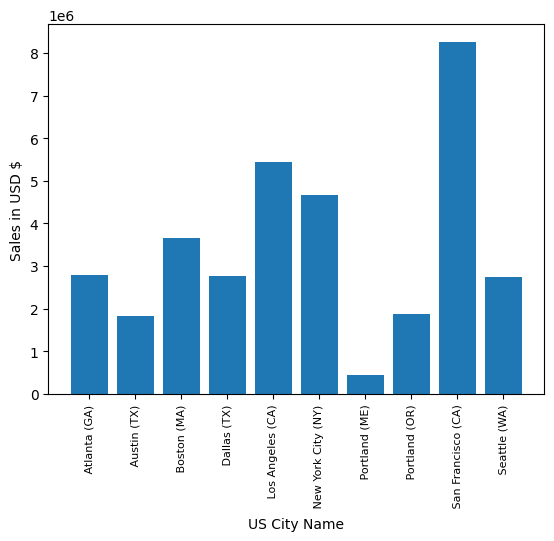

In [127]:
import matplotlib.pyplot as plt
Cities=[city for city, df in all_data.groupby('City')]
plt.bar(Cities,results['Sales'])
plt.xticks(Cities, rotation='vertical',size=8)
plt.ylabel('Sales in USD $')
plt.xlabel('US City Name')
plt.show()

##Q: What time of displaying advertisement to maximise the sales

In [128]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas (TX),10,56
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles (CA),17,26
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,New York City (NY),17,20
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City (NY),22,26
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles (CA),16,10


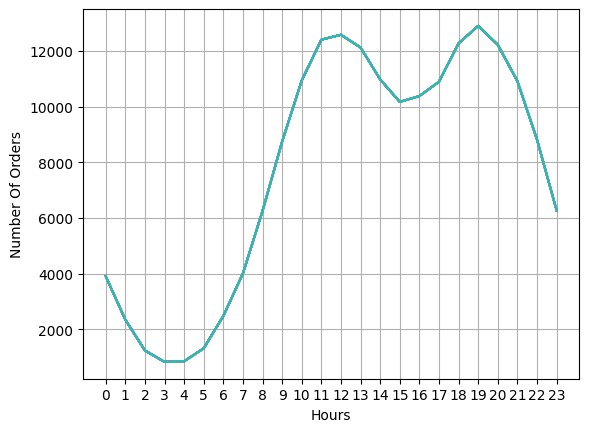

In [129]:
hours=[hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())
#all_data.groupby(['Hour']).count()
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number Of Orders')
plt.grid()
plt.show()


##Q: Which products are most sold together

In [130]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df.head(100)

<ipython-input-130-f321ad44697f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
62,259420,"Google Phone,USB-C Charging Cable"
65,259422,"Google Phone,USB-C Charging Cable"
82,259438,"iPhone,Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor,ThinkPad Laptop"
123,259477,"LG Dryer,AAA Batteries (4-pack)"
...,...,...
2369,261617,"Google Phone,USB-C Charging Cable"
2393,261639,"Wired Headphones,AAA Batteries (4-pack)"
2407,261652,"AAA Batteries (4-pack),27in FHD Monitor"
2439,261683,"Macbook Pro Laptop,ThinkPad Laptop"


In [131]:
from typing import Counter
from itertools import combinations
from collections import Counter
count=Counter()
for row in df['Grouped']:
  row_list=row.split(',')
  count.update(Counter(combinations(row_list,2)))
for key, values in count.most_common(10):
  print(key, values)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


##Q:what product sold the most and why do you this so?

In [132]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas (TX),10,56
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles (CA),17,26
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,New York City (NY),17,20
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City (NY),22,26
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles (CA),16,10


<ipython-input-135-053221dcac14>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered=product_Group.sum()['Quantity Ordered']


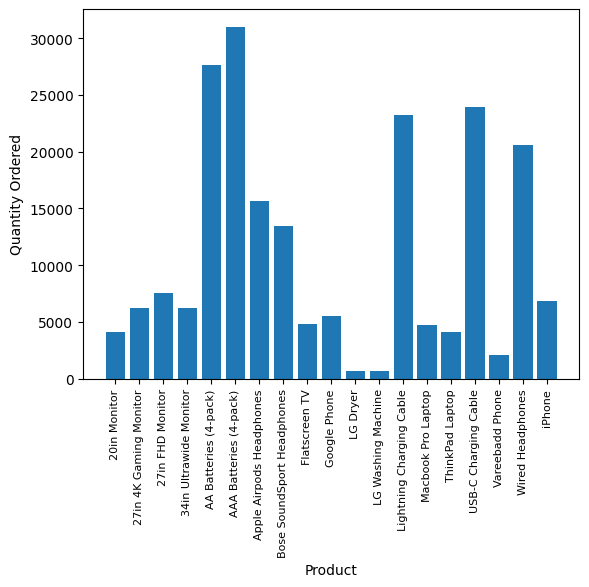

In [135]:
product_Group=all_data.groupby('Product')
quantity_ordered=product_Group.sum()['Quantity Ordered']

products=[product for product,df in product_Group]

plt.bar(products, quantity_ordered)

plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(products,rotation='vertical',size=8)
plt.show()

<ipython-input-136-50e30e599c8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices=all_data.groupby('Product').mean()['Price Each']
<ipython-input-136-50e30e599c8f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


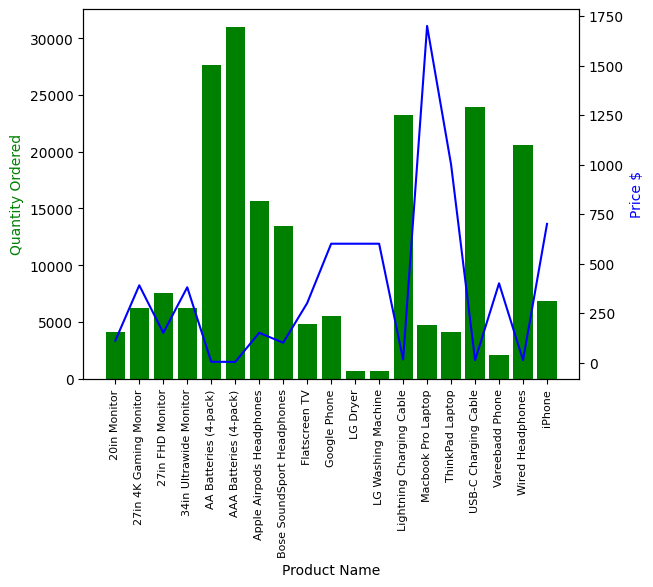

In [136]:
prices=all_data.groupby('Product').mean()['Price Each']
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price $',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
print(prices)